In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

In [115]:
df = pd.read_csv('../seir/cov_datasets/all.csv')
df['Date'] = pd.to_datetime(df['Date'])
print(df.shape)
print(df.dtypes)
df.head()

(555, 4)
Date                     datetime64[ns]
Cummulative_Deaths              float64
Infected                        float64
Cummulative_Recovered           float64
dtype: object


,Date,Cummulative_Deaths,Infected,Cummulative_Recovered
0,2020-02-14,1.0,5.0,12.0
1,2020-02-15,1.0,4.0,12.0
2,2020-02-16,1.0,1.0,13.0
3,2020-02-17,1.0,6.0,12.0
4,2020-02-18,1.0,8.0,14.0


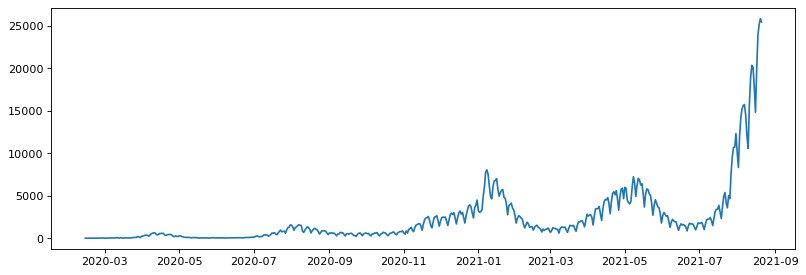

In [69]:
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)
plt.plot(df['Date'],df['Infected'])
plt.show()

In [70]:
training_set = df.iloc[:500, 2:3].values.astype(int)
test_set = df.iloc[500:, 2:3].values.astype(int)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(test_set)


# Creating a data structure with 5 time-steps and 2 output
X_train = []
y_train = []

X_test = []
y_test = []
steps = 5 #days

In [71]:
print(training_set_scaled.shape)
print(testing_set_scaled.shape)

(500, 1)
(55, 1)


In [72]:
def split_seq(sequence, n_steps_in, n_steps_out):
    X = []
    y = []
    for i in range(len(sequence)):
        end_idx = i + n_steps_in
        steps_out_idx = end_idx + n_steps_out
        
        #check if we reach end of arr or not
        if (steps_out_idx > len(sequence)):
            break
        seq_x = sequence[i:end_idx]
        seq_y = sequence[end_idx:steps_out_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [82]:
X_train , y_train = split_seq(training_set_scaled, 14,1)
X_test , y_test = split_seq(testing_set_scaled, 14,1)

In [84]:
y_test

array([[[0.02018577]],

       [[0.05581246]],

       [[0.08769955]],

       [[0.09726969]],

       [[0.09771201]],

       [[0.11588725]],

       [[0.08460332]],

       [[0.05344003]],

       [[0.11074028]],

       [[0.15859102]],

       [[0.17680647]],

       [[0.12927741]],

       [[0.10402509]],

       [[0.16160682]],

       [[0.14757328]],

       [[0.26659697]],

       [[0.34496763]],

       [[0.38996341]],

       [[0.39161205]],

       [[0.45594917]],

       [[0.36877237]],

       [[0.29494551]],

       [[0.44521292]],

       [[0.53138445]],

       [[0.57332422]],

       [[0.58848365]],

       [[0.5931481 ]],

       [[0.54155776]],

       [[0.44489123]],

       [[0.38509791]],

       [[0.59431421]],

       [[0.71993245]],

       [[0.77880092]],

       [[0.76975351]],

       [[0.67702762]],

       [[0.55639551]],

       [[0.76235474]],

       [[0.92162934]],

       [[0.97128956]],

       [[1.        ]],

       [[0.98403635]]])

In [83]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 14, 1) (486, 1, 1)
(41, 14, 1) (41, 1, 1)


In [75]:
input_shape = (X_train.shape[1],X_train.shape[2])
input_shape

(14, 1)

In [76]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0362
Epoch 2/50
16/16 [==============================] - 0s 15ms/step - loss: 0.0137
Epoch 3/50
16/16 [==============================] - 0s 16ms/step - loss: 0.0129
Epoch 4/50
16/16 [==============================] - 0s 15ms/step - loss: 0.0113
Epoch 5/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0141
Epoch 6/50
16/16 [==============================] - 0s 16ms/step - loss: 0.0110
Epoch 7/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0105
Epoch 8/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0123
Epoch 9/50
16/16 [==============================] - 0s 16ms/step - loss: 0.0098
Epoch 10/50
16/16 [==============================] - 0s 24ms/step - loss: 0.0095: 0s - loss: 0.0
Epoch 11/50
16/16 [==============================] - 0s 19ms/step - loss: 0.0104
Epoch 12/50
16/16 [==============================] - 0s 21ms/step - loss: 0.0085
Epoch 13/50
16/16 [==

In [77]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred) #revert scaling

In [78]:
print(y_pred.shape)
y_pred = y_pred.reshape(41)
print(y_pred)

(41, 1)
[ 2240.2231  2331.4182  2415.0403  2525.5286  2670.5464  2879.3486
  3163.3853  3447.6233  3647.1838  3819.0308  4007.0156  4251.027
  4540.527   4813.355   5014.3477  5138.5713  5387.5913  5911.2256
  6786.6772  7977.2305  9423.236  10794.02   11777.286  12457.979
 12968.889  13464.51   14001.81   14632.875  15305.424  15681.772
 15684.18   15434.821  15272.446  15496.296  16261.319  17184.107
 17862.92   18457.168  19087.965  19902.285  20939.736 ]


array([ 1491.,  2377.,  3170.,  3408.,  3419.,  3871.,  3093.,  2318.,
        3743.,  4933.,  5386.,  4204.,  3576.,  5008.,  4659.,  7619.,
        9568., 10687., 10728., 12328., 10160.,  8324., 12061., 14204.,
       15247., 15624., 15740., 14457., 12053., 10566., 15769., 18893.,
       20357., 20132., 17826., 14826., 19948., 23909., 25144., 25858.,
       25461.])

In [91]:
#y_test = y_test.reshape(41)
y_test = sc.inverse_transform(y_test.reshape(41,1)).reshape(41) #revert scaling
print(y_test)

[ 1491.  2377.  3170.  3408.  3419.  3871.  3093.  2318.  3743.  4933.
  5386.  4204.  3576.  5008.  4659.  7619.  9568. 10687. 10728. 12328.
 10160.  8324. 12061. 14204. 15247. 15624. 15740. 14457. 12053. 10566.
 15769. 18893. 20357. 20132. 17826. 14826. 19948. 23909. 25144. 25858.
 25461.]


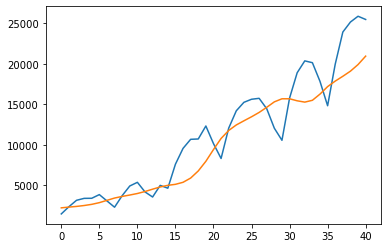

In [92]:
plt.plot(y_test)
plt.plot(y_pred)

### Adding news

In [113]:
df_news = pd.read_csv('../nlp/Aug30th_all_articles_bin_graded.csv')
df_news['news_written_date'] = pd.to_datetime(df_news['news_written_date'])
df_news['news_written_date'] = df_news['news_written_date'].dt.date
print(df_news.shape)
print(df_news.dtypes)
df_news.tail()

(1329, 6)
binary_score (1:good   0: bad)    float64
news_title                         object
news_writer                        object
news_written_date                  object
news_text                          object
news_url                           object
dtype: object


C:\Users\maidu\.conda\envs\tf\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname JST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,binary_score (1:good 0: bad),news_title,news_writer,news_written_date,news_text,news_url
1324,0.0,COVID-19 cases (Aug. 31),['THE ASAHI SHIMBUN'],2020-09-01,NaN,https://www.asahi.com//ajw/articles/13686785
1325,0.0,Tokyo confirms 100 new cases of COVID-19; seve...,['THE ASAHI SHIMBUN'],2020-08-31,Tokyo confirmed 100 new COVID-19 infections o...,https://www.asahi.com//ajw/articles/13684411
1326,0.0,Tokyo partners with Line for new COVID-19 chec...,['By RIHITO KARUBE/ Staff Writer'],2020-08-31,Health centers in Tokyo will soon have a new ...,https://www.asahi.com//ajw/articles/13684298
1327,0.0,COVID-19 cases (Aug. 30),['THE ASAHI SHIMBUN'],2020-08-31,NaN,https://www.asahi.com//ajw/articles/13683645
1328,1.0,"Japanese wear face masks, but the main reason ...",['By MASANORI KOBAYASHI/ Staff Writer'],2020-08-31,Japanese people have taken to wearing face ma...,https://www.asahi.com//ajw/articles/13655141


In [116]:
#run once only

df = df.set_index('Date') #Infected list
print(df.shape, df_news.shape)
df_news = df_news.set_index('news_written_date')


(555, 3) (1329, 6)


#### Merge df and df_news

In [120]:

df_merged = pd.merge(df,df_news, how='inner', left_index=True, right_index=True)
df_merged

,Cummulative_Deaths,Infected,Cummulative_Recovered,binary_score (1:good 0: bad),news_title,news_writer,news_text,news_url
2020-08-31,1295.0,430.0,57130.0,0.0,Tokyo confirms 100 new cases of COVID-19; seve...,['THE ASAHI SHIMBUN'],Tokyo confirmed 100 new COVID-19 infections o...,https://www.asahi.com//ajw/articles/13684411
2020-08-31,1295.0,430.0,57130.0,0.0,Tokyo partners with Line for new COVID-19 chec...,['By RIHITO KARUBE/ Staff Writer'],Health centers in Tokyo will soon have a new ...,https://www.asahi.com//ajw/articles/13684298
2020-08-31,1295.0,430.0,57130.0,0.0,COVID-19 cases (Aug. 30),['THE ASAHI SHIMBUN'],NaN,https://www.asahi.com//ajw/articles/13683645
2020-08-31,1295.0,430.0,57130.0,1.0,"Japanese wear face masks, but the main reason ...",['By MASANORI KOBAYASHI/ Staff Writer'],Japanese people have taken to wearing face ma...,https://www.asahi.com//ajw/articles/13655141
2020-09-01,1306.0,624.0,57735.0,0.0,Tokyo reports 2nd case of virus infections in ...,['THE ASAHI SHIMBUN'],While Tokyo recorded less than 200 new COVID-...,https://www.asahi.com//ajw/articles/13687614
...,...,...,...,...,...,...,...,...
2021-08-20,15556.0,25858.0,1033914.0,0.0,"New guidelines eyed for issuing, ending state ...",['By KEISHI NISHIMURA/ Staff Writer'],The government is considering changing its gu...,https://www.asahi.com//ajw/articles/14421871
2021-08-20,15556.0,25858.0,1033914.0,0.0,COVID-19 cases (Aug. 19),['THE ASAHI SHIMBUN'],NaN,https://www.asahi.com//ajw/articles/14421857
2021-08-20,15556.0,25858.0,1033914.0,0.0,Kyoto eateries whip up industry certification ...,['By RIKAKO TAKAI/ Staff Writer'],"KYOTO--In the age of the novel coronavirus, h...",https://www.asahi.com//ajw/articles/14413954
2021-08-21,15589.0,25461.0,1048617.0,0.0,"COVID-19 cases in Tokyo top 5,000; records in ...",['THE ASAHI SHIMBUN'],"Tokyo confirmed 5,074 fresh cases of COVID-19...",https://www.asahi.com//ajw/articles/14422889


In [130]:
df_merged.columns

Index(['Cummulative_Deaths', 'Infected', 'Cummulative_Recovered',
       'binary_score (1:good   0: bad)', 'news_title', 'news_writer',
       'news_text', 'news_url'],
      dtype='object')

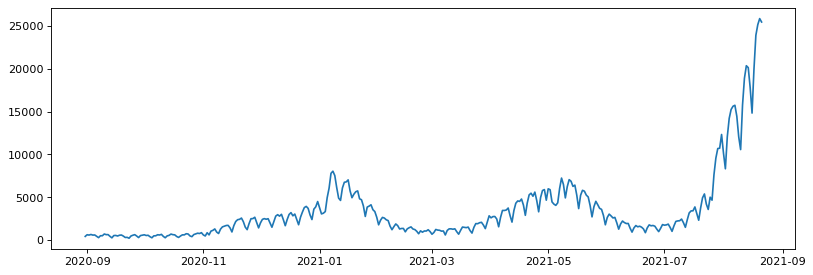

In [125]:
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)
plt.plot(df_merged['Infected'])

In [244]:
df_inf_news = df_merged[['Infected','binary_score (1:good   0: bad)']]
df_inf_news

,Infected,binary_score (1:good 0: bad)
2020-08-31,430.0,0.0
2020-08-31,430.0,0.0
2020-08-31,430.0,0.0
2020-08-31,430.0,1.0
2020-09-01,624.0,0.0
...,...,...
2021-08-20,25858.0,0.0
2021-08-20,25858.0,0.0
2021-08-20,25858.0,0.0
2021-08-21,25461.0,0.0


In [245]:
df_inf_news.to_csv('df_infected_news.csv')

#### Only scale binary score

In [180]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
infected_scaled = sc.fit_transform(df_inf_news['Infected'].values.astype(int).reshape(len(df_inf_news), 1))
df_inf_news['infected_scaled'] = infected_scaled[:,0]
df_inf_news.head()

<ipython-input-180-0319d7a8f12e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_news['infected_scaled'] = infected_scaled[:,0]


,Infected,binary_score (1:good 0: bad),infected_scaled
2020-08-31,430.0,0.0,0.008346
2020-08-31,430.0,0.0,0.008346
2020-08-31,430.0,0.0,0.008346
2020-08-31,430.0,1.0,0.008346
2020-09-01,624.0,0.0,0.015911


In [ ]:
def split_seq(sequence, n_steps_in, n_steps_out):
    X = []
    y = []
    for i in range(len(sequence)):
        end_idx = i + n_steps_in
        steps_out_idx = end_idx + n_steps_out
        
        #check if we reach end of arr or not
        if (steps_out_idx > len(sequence)):
            break
        seq_x = sequence[i:end_idx]
        seq_y = sequence[end_idx:steps_out_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [222]:
X_infected, y_infected = split_seq(df_inf_news['infected_scaled'],14,2)
#print(X_infected.shape, y_infected.shape)
X_news, y_news = split_seq(df_inf_news['binary_score (1:good   0: bad)'],14,2)
#print(X_news.shape, y_news.shape)

### Concat horizotally with hstack
X = np.hstack([X_infected,X_news])
y = np.hstack([y_infected]) #only output infected cases
X = X.reshape((X.shape[0],X.shape[1],1))
y = y.reshape((y.shape[0],y.shape[1],1))

print(X.shape)
print(y.shape)

(1285, 28, 1)
(1285, 2, 1)


In [243]:
X[1280:,:,:]

array([[[0.92399189],
        [0.92399189],
        [0.92399189],
        [0.92399189],
        [0.92399189],
        [0.92399189],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [1.        ],
        [1.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.92399189],
        [0.92399189],
        [0.92399189],
        [0.92399189],
        [0.92399189],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [0.97215506],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [223]:
X_train = X[:1000,:]
X_test  = X[1000:,:]
y_train = y[:1000,:]
y_test  = y[1000:,:]

In [224]:
input_shape = (X_train.shape[1],X_train.shape[2])
input_shape

(28, 1)

In [238]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 2))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 1s 30ms/step - loss: nan
Epoch 2/50
32/32 [==============================] - 1s 31ms/step - loss: nan
Epoch 3/50
32/32 [==============================] - 1s 35ms/step - loss: nan
Epoch 4/50
19/32 [================>.............] - ETA: 0s - loss: nan

KeyboardInterrupt: 

In [230]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred) #revert scaling

In [233]:
np.isnan(X_train)

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])

In [ ]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y

In [ ]:

# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

print(yhat)

In [ ]:
X

In [ ]:
dataset

In [ ]:
y

In [132]:
from numpy import array
data = array([
	[0.1, 1.0],
	[0.2, 0.9],
	[0.3, 0.8],
	[0.4, 0.7],
	[0.5, 0.6],
	[0.6, 0.5],
	[0.7, 0.4],
	[0.8, 0.3],
	[0.9, 0.2],
	[1.0, 0.1]])
data = data.reshape(1, 10, 2)
print(data.shape)

(1, 10, 2)


In [133]:
data

array([[[0.1, 1. ],
        [0.2, 0.9],
        [0.3, 0.8],
        [0.4, 0.7],
        [0.5, 0.6],
        [0.6, 0.5],
        [0.7, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.1]]])

In [181]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])